In [13]:
import numpy as np
import pandas as pd
import timeit

# Please, to run the experiment donwload the following dataset and put it in the /Datasets folder:
# 	- household_power_consumption.txt - 
#       https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
#       (extract the .txt file)

filename = "Datasets/household_power_consumption.txt"
df = pd.read_csv(filename, sep=';', header=0, usecols=[2,3,4])
df = df.dropna()

print(list(df.columns.values))

/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['Global_active_power', 'Global_reactive_power', 'Voltage']


In [14]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

df = df.dropna()

print(df.shape)
print(df.dtypes)

df.head()

(2049280, 3)
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
dtype: object


,Global_active_power,Global_reactive_power,Voltage
0,4.216,0.418,234.84
1,5.360,0.436,233.63
2,5.374,0.498,233.29
3,5.388,0.502,233.74
4,3.666,0.528,235.68


In [15]:
x = df[['Global_active_power','Global_reactive_power']]
x = x.to_numpy()
y = df['Voltage']
y = y.to_numpy()
n = x.shape[1]

In [16]:
import recombination as rb

print(x.shape)
X = np.append(x,y[np.newaxis].T,1)
xy_sq = rb.tens_sq(X)

print(xy_sq.shape)
print(xy_sq[:,n+1:].shape)

N, d = xy_sq[:,n+1:].shape

(2049280, 2)
(2049280, 9)
(2049280, 6)


In [17]:
mean_t = 0.

time_rand = []
iterations_rand = []

min_t = np.inf
max_t = 0.
sample = 1000

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_Mor_reset(
                    xy_sq[:,n+1:]-np.mean(xy_sq[:,n+1:],0), 400)
    time_rand.append((timeit.default_timer()-tic)*1000)
    iterations_rand.append(iterations)
    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHCEK FINISHED
    
    mean_t += time_rand[-1]
    print("sample = ", i)
    print("time = ", time_rand[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_rand)
max_t = max(time_rand)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("---------------------------------------")

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:376: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)


sample =  0
time =  345.85067900002286 ms
mean time =  345.85067900002286 ms
sample =  1
time =  283.3839480000506 ms
mean time =  314.61731350003674 ms
sample =  2
time =  101.29710000001069 ms
mean time =  243.51057566669473 ms
sample =  3
time =  273.1181120000201 ms
mean time =  250.91245975002607 ms
sample =  4
time =  96.05959900000016 ms
mean time =  219.9418876000209 ms
sample =  5
time =  269.33374999998705 ms
mean time =  228.1738646666819 ms
sample =  6
time =  276.5296979999903 ms
mean time =  235.08184085715453 ms
sample =  7
time =  102.13036300001477 ms
mean time =  218.46290612501207 ms


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:401: RuntimeWarning: invalid value encountered in greater
  tmp_2 = np.transpose(AX>0)


sample =  8
time =  642.8703970000242 ms
mean time =  265.61929400001344 ms
sample =  9
time =  104.47761000000355 ms
mean time =  249.50512560001243 ms
sample =  10
time =  123.69391599997925 ms
mean time =  238.06774290910033 ms
sample =  11
time =  130.26696100007484 ms
mean time =  229.08434441668155 ms
sample =  12
time =  103.99333200007277 ms
mean time =  219.46195884617316 ms
sample =  13
time =  97.9332690000092 ms
mean time =  210.78133814287574 ms
sample =  14
time =  96.03760899994995 ms
mean time =  203.13175620001402 ms
ERROR: NO convergence
sample =  15
time =  1750.600994000024 ms
mean time =  299.84858356251465 ms
sample =  16
time =  95.83255300003657 ms
mean time =  287.84764058825124 ms
sample =  17
time =  94.50898900001903 ms
mean time =  277.106604388905 ms
sample =  18
time =  376.4268959999981 ms
mean time =  282.3339881579099 ms
sample =  19
time =  270.6567230000019 ms
mean time =  281.7501249000145 ms
sample =  20
time =  91.3124029999608 ms
mean time =  272

/Users/fcosentino/opt/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


sample =  308
time =  91.38601400002244 ms
mean time =  273.9832367928816 ms
sample =  309
time =  1094.4893830001092 ms
mean time =  276.6300308129049 ms
sample =  310
time =  95.23317100001805 ms
mean time =  276.0467611672043 ms
sample =  311
time =  261.9011410000667 ms
mean time =  276.0014226410276 ms
sample =  312
time =  89.94773699998859 ms
mean time =  275.40700192012974 ms
sample =  313
time =  90.6782460000386 ms
mean time =  274.8186937802568 ms
sample =  314
time =  269.8331210000333 ms
mean time =  274.8028665650815 ms
sample =  315
time =  484.25432199996976 ms
mean time =  275.4656876265843 ms
sample =  316
time =  86.9780630000605 ms
mean time =  274.8710894416426 ms
sample =  317
time =  88.73971299999539 ms
mean time =  274.285770647801 ms
sample =  318
time =  1093.2269709999218 ms
mean time =  276.8529844420082 ms
sample =  319
time =  94.15932499996416 ms
mean time =  276.2820667562519 ms
sample =  320
time =  94.7694029999866 ms
mean time =  275.7166067445501 ms

In [18]:
mean_t = 0.
sample = 100
time_MT = []

min_t = np.inf
max_t = 0.

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    x_cp = np.copy(xy_sq[:,n+1:])
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.Tchernychova_Lyons(
                    x_cp)
    time_MT.append((timeit.default_timer()-tic)*1000)
    
    ################ CHECK
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1

    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_MT[-1]
    print("sample = ", i)
    print("time = ", time_MT[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_MT)
max_t = max(time_MT)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std FC = ", np.std(time_MT))
print("---------------------------------------")

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  0
time =  431.2915539999267 ms
mean time =  431.2915539999267 ms
sample =  1
time =  400.75770399994326 ms
mean time =  416.024628999935 ms
sample =  2
time =  390.8848119999675 ms
mean time =  407.6446899999458 ms
sample =  3
time =  362.0224450000933 ms
mean time =  396.2391287499827 ms
sample =  4
time =  360.21823900000527 ms
mean time =  389.0349507999872 ms
sample =  5
time =  337.75451999986217 ms
mean time =  380.4882123332997 ms
sample =  6
time =  348.53896200002055 ms
mean time =  375.9240337142598 ms
sample =  7
time =  340.14948599997297 ms
mean time =  371.45221524997396 ms
sample =  8
time =  334.16916900000615 ms
mean time =  367.3096545555331 ms
sample =  9
time =  327.6337180000155 ms
mean time =  363.34206089998133 ms
sample =  10
time =  333.1694080000034 ms
mean time =  360.5990924545288 ms
sample =  11
time =  329.7235649999948 ms
mean time =  358.0261318333176 ms
sample =  12
time =  332.208959999889 ms
mean time =  356.0401955384385 ms
sample =  13
tim

In [19]:
from Maalouf_Jubran_Feldman import Fast_Caratheodory

time_FC = []
mean_t = 0.

for i in range(100):
    tic = timeit.default_timer()
    Fast_Caratheodory(xy_sq[:,n+1:],np.ones(N),d+1)
    time_FC.append((timeit.default_timer()-tic)*1000)
    mean_t += time_FC[-1]
    print("sample = ", i)
    print("time = ", time_FC[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")


print("---------------------------------------")
print("max FC = ", np.max(time_FC), " ms")
print("min FC = ", np.min(time_FC), " ms")   
print("mean FC = ", np.mean(time_FC), " ms")
print("std FC = ", np.std(time_FC))
print("---------------------------------------")

sample =  0
time =  395.6475079999109 ms
mean time =  395.6475079999109 ms
sample =  1
time =  362.867635999919 ms
mean time =  379.25757199991494 ms
sample =  2
time =  373.2049709999501 ms
mean time =  377.24003833326 ms
sample =  3
time =  358.9595939999981 ms
mean time =  372.6699272499445 ms
sample =  4
time =  356.8083160000697 ms
mean time =  369.49760499996955 ms
sample =  5
time =  357.2268890000032 ms
mean time =  367.45248566664185 ms
sample =  6
time =  352.7929439999298 ms
mean time =  365.3582654285401 ms
sample =  7
time =  365.4058439999517 ms
mean time =  365.36421274996655 ms
sample =  8
time =  355.7961820001765 ms
mean time =  364.3010982222121 ms
sample =  9
time =  360.71794500003307 ms
mean time =  363.9427828999942 ms
sample =  10
time =  354.9476750001759 ms
mean time =  363.1250458181925 ms
sample =  11
time =  372.7174250000189 ms
mean time =  363.9244107500114 ms
sample =  12
time =  360.34902300002614 ms
mean time =  363.64938092308944 ms
sample =  13
time 

In [20]:
mean_t = 0.
sample = 1000

time_log = np.zeros(sample)
min_t = 0.
max_t = 0.

COV = np.matmul(x[:,:].T,x[:,:])/N
    
for i in range(sample):
    x_cp = np.copy(xy_sq[:,n+1:])

    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, _, _ = rb.recomb_log(x_cp)
    time_log[i] = (timeit.default_timer()-tic)*1000

    ################ CHECK
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1

    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED

    mean_t += time_log[i]
    print("sample = ", i)
    print("time = ", time_log[i], "ms")
    print("mean time = ", mean_t/(i+1), "ms")
    
mean_t = np.mean(time_log)
min_t = np.min(time_log)
max_t = np.max(time_log)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

sample =  0
time =  112.97232400011126 ms
mean time =  112.97232400011126 ms
sample =  1
time =  130.0599379999312 ms
mean time =  121.51613100002123 ms
sample =  2
time =  143.77897600002143 ms
mean time =  128.93707933335463 ms
sample =  3
time =  141.3502249999965 ms
mean time =  132.0403657500151 ms
sample =  4
time =  138.15057100009653 ms
mean time =  133.26240680003139 ms
sample =  5
time =  129.4286209999882 ms
mean time =  132.6234425000242 ms
sample =  6
time =  132.35979900014172 ms
mean time =  132.58577914289813 ms
sample =  7
time =  136.2756089999948 ms
mean time =  133.0470078750352 ms
sample =  8
time =  134.39322800013542 ms
mean time =  133.19658788893523 ms
sample =  9
time =  134.8969149998993 ms
mean time =  133.36662060003164 ms
sample =  10
time =  136.68261899988465 ms
mean time =  133.66807500001826 ms
sample =  11
time =  141.77981600005296 ms
mean time =  134.34405341668784 ms
sample =  12
time =  134.23669400003746 ms
mean time =  134.33579500002242 ms
samp

In [21]:
time_rand = np.array(time_rand)
iterations_rand = np.array(iterations_rand)
time_FC = np.array(time_FC)
time_log = np.array(time_log)
time_MT = np.array(time_MT)

np.set_printoptions(precision=1)

print("Probability to be faster = ", 
            np.sum(np.array(time_rand)<np.mean(time_FC))/sample*100, "%")
print("Probability to be 4x faster = ", 
            np.sum(np.array(time_rand)<np.mean(time_FC)/4)/sample*100, "%")

print("Standard deviation = ", np.std(time_rand))

print("The expected time of the log-random is ", np.mean(time_log), "ms")

print("Standard deviation of the log-random is  = ", np.std(time_log))

np.set_printoptions(precision=1)
print('''Some statistics for the randomized algorithm are: 
      average running time = ''', np.round(np.mean(time_rand),1),  
      "ms, min = " , np.round(np.min(time_rand),1), "ms, max = ", np.round(np.max(time_rand),1),
      "ms, std ", np.round(np.std(time_rand),1), 
      "ms. Using the log-random strategy they are: average running time = ", np.round(np.mean(time_log),1),
      "ms, min = ", np.round(np.min(time_log),1), "ms, max = ", np.round(np.max(time_log),1),
      ", std = ", np.round(np.std(time_log),1), "ms.",
      " Average runnig times of determinsitic: TL = ", np.round(np.mean(time_MT),1),
      "ms, MJF = ", np.round(np.mean(time_FC),1),"ms.")

Probability to be faster =  77.5 %
Probability to be 4x faster =  24.099999999999998 %
Standard deviation =  309.3431717062124
The expected time of the log-random is  141.01193593099742 ms
Standard deviation of the log-random is  =  4.821233674828523
Some statistics for the randomized algorithm are: 
      average running time =  276.8 ms, min =  86.4 ms, max =  2280.9 ms, std  309.3 ms. Using the log-random strategy they are: average running time =  141.0 ms, min =  113.0 ms, max =  158.8 , std =  4.8 ms.  Average runnig times of determinsitic: TL =  332.6 ms, MJF =  361.4 ms.


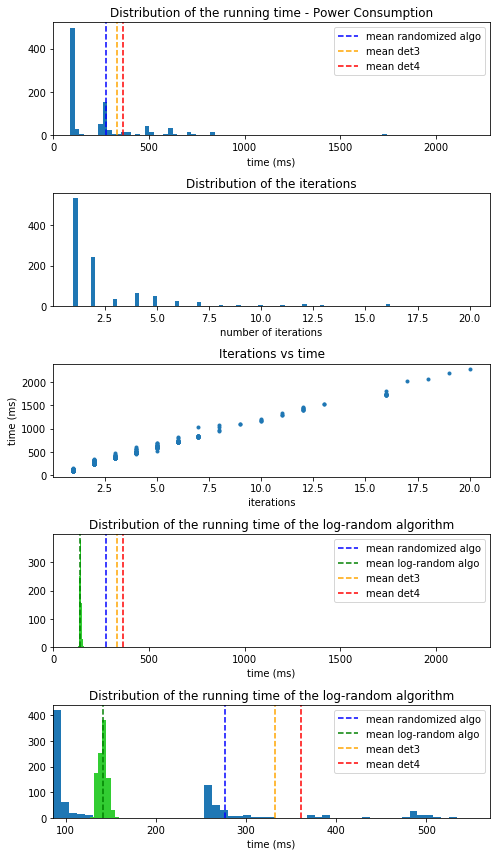

In [40]:
# import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5,1,figsize=(7,12))

################################################
plt.subplot(5, 1, 1)

plt.hist(time_rand, bins=int(90))
plt.axvline(np.mean(time_rand), 0, max(time_rand), linestyle='dashed', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_MT), 0, max(time_MT), linestyle='dashed', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), 0, max(time_rand), linestyle='dashed', color="red", label="mean det4")

plt.xlim((0, max(time_rand)))

plt.legend()
plt.title('Distribution of the running time - Power Consumption')
plt.xlabel('time (ms)')

################################################
plt.subplot(5, 1, 2)

plt.hist(iterations_rand, bins=int(90))
plt.title('Distribution of the iterations')
plt.xlabel('number of iterations')
plt.xscale('linear')

################################################
plt.subplot(5, 1, 3)

plt.plot(iterations_rand,time_rand, '.')
plt.xlabel('iterations')
plt.ylabel('time (ms)')
plt.title('Iterations vs time')

################################################
plt.subplot(5, 1, 4)

plt.hist(time_log, bins=int(10),color='limegreen')
plt.axvline(np.mean(time_rand), 0, max(time_rand), linestyle='dashed', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), 0, max(time_log), linestyle='dashed', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), 0, max(time_MT), linestyle='dashed', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), 0, max(time_rand), linestyle='dashed', color="red", label="mean det4")
plt.xlim((0, max(time_rand)))

plt.title('Distribution of the running time of the log-random algorithm')
plt.legend()
plt.xlabel('time (ms)')


################################################
plt.subplot(5, 1, 5)

plt.hist(time_rand, bins=int(250))
plt.hist(time_log, bins=int(10),color='limegreen')
plt.axvline(np.mean(time_rand), 0, max(time_rand), linestyle='dashed', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), 0, max(time_log), linestyle='dashed', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), 0, max(time_MT), linestyle='dashed', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), 0, max(time_rand), linestyle='dashed', color="red", label="mean det4")
plt.xlim((min(time_rand), max(time_rand)/4.))

plt.title('Distribution of the running time of the log-random algorithm')
plt.legend()
plt.xlabel('time (ms)')

fig.tight_layout()
# plt.savefig('Distrib_running_time_elec.pdf')#, bbox_inches='tight')
plt.show()



In [23]:
mean_t = 0.

time_combined = []

min_t = np.inf
max_t = 0.
sample = 1000

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_combined(
                    xy_sq[:,n+1:], 400)

    time_combined.append((timeit.default_timer()-tic)*1000)
    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_combined[-1]
    print("sample = ", i)
    print("time = ", time_combined[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_combined)
max_t = max(time_combined)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std = ", np.std(time_combined))
print("---------------------------------------")

sample =  0
time =  129.5515140000134 ms
mean time =  129.5515140000134 ms
sample =  1
time =  138.8623960001496 ms
mean time =  134.2069550000815 ms


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:376: RuntimeWarning: invalid value encountered in less_equal
  tmp_1 = np.transpose(AX<=0)
/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:401: RuntimeWarning: invalid value encountered in greater
  tmp_2 = np.transpose(AX>0)


sample =  2
time =  147.15313199985758 ms
mean time =  138.5223473333402 ms
sample =  3
time =  149.4913250000991 ms
mean time =  141.26459175002992 ms
sample =  4
time =  149.23821799993675 ms
mean time =  142.8593170000113 ms
sample =  5
time =  145.37138600007893 ms
mean time =  143.27799516668924 ms
sample =  6
time =  140.899200000149 ms
mean time =  142.9381672857549 ms
sample =  7
time =  140.0918009999259 ms
mean time =  142.58237150002628 ms
sample =  8
time =  146.5310020000743 ms
mean time =  143.02110822225384 ms
sample =  9
time =  150.58476099989093 ms
mean time =  143.77747350001755 ms
sample =  10
time =  149.06304300006923 ms
mean time =  144.25797981820406 ms
sample =  11
time =  148.94106600013401 ms
mean time =  144.64823700003157 ms
sample =  12
time =  146.85492299986436 ms
mean time =  144.81798207694177 ms
sample =  13
time =  142.48851499996817 ms
mean time =  144.65159157144367 ms
sample =  14
time =  142.2545650000302 ms
mean time =  144.4917898000161 ms
samp

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  36
time =  138.1540079999013 ms
mean time =  144.17458275676 ms
sample =  37
time =  135.38262700012638 ms
mean time =  143.9432155000065 ms
sample =  38
time =  136.13943099994685 ms
mean time =  143.74311846154342 ms
sample =  39
time =  139.5671760001278 ms
mean time =  143.63871990000803 ms
sample =  40
time =  140.1603649999288 ms
mean time =  143.55388197561584 ms
sample =  41
time =  135.4971809998915 ms
mean time =  143.36205576190812 ms
sample =  42
time =  136.21152199993958 ms
mean time =  143.19576427907165 ms
sample =  43
time =  140.97339800014197 ms
mean time =  143.14525595455052 ms
sample =  44
time =  136.2294909999946 ms
mean time =  142.99157228889374 ms
sample =  45
time =  134.95893100002831 ms
mean time =  142.81694965217926 ms
sample =  46
time =  134.48771799994574 ms
mean time =  142.6397319574509 ms
ERROR: numerical instability
Using determiinistic Algorithm
sample =  47
time =  140.59326699998564 ms
mean time =  142.59709727083703 ms
sample =  48
t

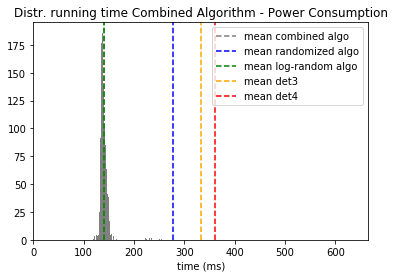

In [24]:
maximum = max(np.mean(time_rand),np.mean(time_log),np.mean(time_MT),np.mean(time_rand),np.mean(time_combined))*2

plt.hist(time_combined,bins=int(70),color='grey')
plt.axvline(np.mean(time_combined), linestyle='dashed', color="grey", label="mean combined algo")
plt.axvline(np.mean(time_rand), linestyle='dashed', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), linestyle='dashed', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), linestyle='dashed', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), linestyle='dashed', color="red", label="mean det4")
plt.xlim((0, maximum))

plt.legend()
plt.title('Distr. running time Combined Algorithm - Power Consumption')
plt.xlabel('time (ms)')

fig.tight_layout()
# plt.savefig('Distrib_running_time_elec_combined.pdf')#, bbox_inches='tight')
plt.show()